<a href="https://colab.research.google.com/github/Jmorgado125/ADA-Informes/blob/main/Informe_Mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema de la mochila 

![image](https://imgur.com/0lGbx5R.png)

#1. Descripcion del Problema 

Este corresponde a un problema de optimizacion en el que busca almacenar objetos con un cierto valor en una "mochila", en el que idealmente se almacenen el mayor valor posible cumpliendo un cierto espacio o peso.


---
#### ***Entrada***: Un valor $W$ que indica la capacidad maxima, ademas de dos arreglos $v_i$ y $w_i$ que indican el valor y el peso respectivo de los objetos.

#### ***Salida***: Un valor $V$ maximo alcanzado por ciertos objetos conciderando $W$.
---


#2. Descripcion del Algoritmos

Problema solucionable por el metodo Greedy y programacion dinamica.para ambos metodos que se utilizarán a continuación aprovechan de la *subestructura óptima* del problema para resolverlo.

**Subestructura Optima**
---
Sea $M[n,P]$ el problema de la mochila para los primeros $n$ elementos y de una capacidad máxima $P$.

Ademas con:


*   $i$ clave actual
*   $p$ peso actual
*   $p[i]$ peso del $i-esimo$
*   $v[i]$ valor del $i-esimo$


![image](https://imgur.com/KOleDIZ.png)

observamos que hay 3 casos:
 * Donde la clave actual es 0 o la capacidad es 0 la solucion a la subestructura es trivialmente 0.
 * Donde $p[i]$ del objeto super la capacidad $P$ la solucion corresponde a la subestructura anterior.
 * Donde $p[i]$ del objeto es menor o igual a la capacidad $P$ se concidera el maximo de la anterior solucion o la anterior mas el valor de la clave actual(restando su peso a $P$).



#### **Descripción para estrategia greedy**

Para esta estrategia se define una *elección greedy*. La idea es decidir que realizar antes de resolver algún subproblema.

***Elección greedy***: Se selecciona aquel elemento con mayor valor por peso con la intención de maximizar la ganancia obtenida.

Este algoritmo recibe como entrada el arreglo de precios $p_i$, el arreglo de pesos $w_i$, la capacidad máxima $W$ y el total de claves $n$

El procedimiento es el siguiente:<br>
1. Se generan dos arreglos, uno conteniendo índices y otro el valor por peso. 
2. Se ordenan los índices según su valor por peso asociados
3. Se declaran dos variables, una para almacenar el valor total y otra para almacenar la capacidad disponible luego de agregar algún elemento.
4. Se itera por cada índice del arreglo de indices, agregando el elemento considerado si la capacidad restante lo permite.


#### **Descripción para el algoritmo dinámico**

El algoritmo dinámico *bottom-up*  consiste en rellenar una matriz con los resultados de subproblemas cuyas dimensiones están delimitadas por los índices de la misma.

La matriz se va rellenando considerando uno a uno cada cantidad de claves y cada capacidad máxima posible de manera creciente

El procedimiento es el siguiente:
> Se declara la matriz para almacenar los subproblemas de dimensiones Values[0.. n, 0.. W]
>
> Se recorre cada fila de la matriz de forma ascendiente. La primera iteración, cuando $i = 0$, considera $0$ elementos para agregar a la mochila. De forma análoga, cuando $i = 4$ se consideran 4 elementos para agregar a la mochila
>
>> Para cada iteración de $i$, se itera para cada capacidad $j = 0.. W$ posible.
>>> Si $i==0$ o $W==0$, no hay items o espacio para almacenar. El valor máximo en estas ocasiones es $0$.
>>>
>>> Si el peso de elemento $w_{i-1}$ es mayor al de la capacidad actual considerada, el valor máximo de este caso será aquel de igual capacidad pero sin el elemento considerado *(Uno de los problemas previamente resueltos)*
>>>
>>> En cualquier otro caso, el valor máximo estará dado por la cantidad mayor de dos opciones:
>>> * El valor máximo para el problema de misma capacidad pero sin considerar el $i$-ésimo elemento.
>>> * El valor del elemento a considerar más el valor máximo para el problema que no considera el elemento $i$-ésimo y con capacidad $w-w_i$ *(Capacidad restante al agregar el $i$-ésimo)*

Al finalizar, el resultado óptimo final será definido por $values[n, W]$, ya que considera todas las claves y la capacidad máxima posible.


**Generador de instancias**

In [33]:
import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

W, val, wt = knapsack_instance_generator(10)


**Solucion metodo Greedy**

In [34]:
def metodo_greedy(W, val, wt, n, verbose = False):

    # Lista de indices
    index = list(range(n))

    # Calculo de valor por unidad de peso
    vp = [value/weight for value, weight in zip(val, wt)]
    
    # Ordenar indices segun su valor por unidad de peso
    index.sort(key=lambda i: vp[i], reverse=True)

    max_value = 0
    max_weight = W
    items = []
    iterations = 0

    # Agregar items
    for i in index:

        iterations += 1

        if wt[i] <= max_weight:
            max_value += val[i]
            max_weight -= wt[i]
            items.append(i)
    
            continue
    

    
    return max_value, items, iterations


# Ejemplo 

val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)

valor, items, iteraciones = metodo_greedy(W, val, wt, n, verbose = False)

print(f"El supuesto valor maximo es {valor} con {iteraciones} iteraciones")
print(f"Items : {items}")

El supuesto valor maximo es 160 con 3 iteraciones
Items : [0, 1]


**Solucion con programacion Dinamica**

In [35]:
def metodo_dinamico(W, val, wt, n, verbose = False):

    # Generar matriz que guarde los resultados optimos a subproblemas
    values = [[0 for _ in range( W + 1 )] for _ in range(n + 1)]

    # Contador de subproblemas
    cont = 0


    for i in range (n+1):           # Recorrer para cantidad de items 
        for j in range (W+1):       # Recorrer para pesos maximos

            cont += 1
            # Caso base, no claves o capacidad de 0
            if i == 0 or W == 0 :
                values[i][j] == 0
            else:
                # Resolucion basada en resultados previos
                if wt[i-1] <= j :
                    
                    a = val[i-1] + values[i-1][j-wt[i-1]]
                    b = values[i-1][j]
                    values[i][j] = max(a, b)

                else:
                    values[i][j] = values [i-1][j]

    return values[n][W], cont, values

# Ejemplo

val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)

valor, comp , valores = metodo_dinamico(W, val, wt, n, verbose = False)

print(f"El valor maximo es {valor} con {comp} subproblemas")

El valor maximo es 220 con 204 subproblemas


#3. Tiempo de Ejecucion 

#### ***Tiempo de ejecución para algoritmo greedy***

Para determinar el tiempo de ejecución del acercamiento greedy hay que observar las operaciones que realiza el algoritmo:

> Declaracion de un arreglo $= O(1)$
>
> Cálculo de valor por unidad de peso $= O(n)$
>
> Orden de los valores $= O(n\cdot log{n})$
>
> Declaración variables para almacenar información relevante $= 3\cdot O(1)$
>
> Iterar por el arreglo de indices de tamaño $n$ para agregar los valores : $=O(n)$
>
> Por cada iteración, se realizan 3 operaciones de costo constante $=3\cdot O(1)$

Terminamos con la siguiente expresión: $(2 + n)\cdot O(1) + O(n\cdot \log{n}) + O(n) = O(n\cdot \log{n})$

Por lo tanto, el tiempo de ejecución de algortimo será de ***$O(n\cdot \log{n}$***), principalmente dado al ordenamiento que hay que realizar.

#### **Tiempo de ejecución para algoritmo bottom-up**

Para determinar el tiempo de ejecución hay que observar el funcionamiento del algoritmo.

> Se declara y rellena de 0 una matriz de tamaño $n\cdot w$, siendo $n$ la cantidad de claves disponibles y $w$ la capacidad máxima para el problema. $= O(n\cdot w)$
>
> Se observa la existencia de dos ciclos $n$ y $w$  anidados, cada uno corrspondiendo a la cantidad de items disponibles y la capacidad máxima para el problema, respectivamente. $= O(n\cdot w)$
>
>Dentro de estos ciclos se realizan operaciones de coste contante *(Acceso a matrices, sumas y comparaciones de dos elementos)* $= O(1)$

Por lo tanto, gracias a la matriz de valores, el tiempo de ejecución es de ***$O(n\cdot w)$***

<br>

---

#4. Correctitud 



##*teorema: El algoritmo genera un conjunto de objetos parte del conjunto original que representa el valor total maximo alcanzado para el problema*

##**Propiedad invariante**:
Al comienzo de cada iteracion, el elemento $M[n,W]$ siempre almacenara la maxima ganancia posible del problema solucionado en aquel momento.

###**Caso Base**:
Previo a la primera iteracion,nuestra matriz M es inicializada en 0, por lo tanto,la posicion $M[i,j]$,tendra trivialmente como maxima solucion de ganancia 0.

###**Caso Mantencion**:
Al calcular un valor $M[i, j]$, se tiene por inducción que todo subproblema menor ha sido resuelto de forma correcta. Por lo tanto, los valores $M[i-1, j]$ y $M[i-1, j-w_{i}]$ son correctos.

Para calcular el valor óptimo para el par de índices $(i, j)$ se considera la siguiente expresión : $max(M[i-1, j],  M[i-1, j-w_{i}] + p_{i})$, siendo el primer término aquel que no considera el elemento a agregar y el segundo, el que si.

Dado este el valor de $M[i, j]$ es correcto.

#5. Experimentacion

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep')
sns.set(rc={'figure.figsize':(11.7,8.27)})

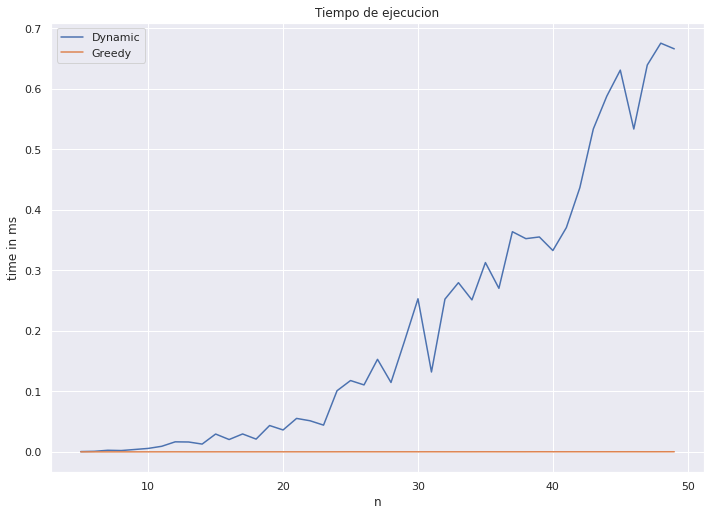

In [31]:
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Tiempo

x=[]; x2=[]
y=[]; y2=[]

for n in range(5, 50):

  W, val, wt = knapsack_instance_generator(n)
  W, val, wt

  t = repeat(setup="from __main__ import metodo_dinamico", stmt=f"metodo_dinamico({W}, {val}, {wt}, {n})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import metodo_greedy", stmt=f"metodo_greedy({W}, {val}, {wt}, {n})", repeat=1, number=10)

  x.append(n)
  x2.append(n)
  y.append(t)
  y2.append(t2)
  
plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Dynamic", "Greedy"])
plt.title("Tiempo de ejecucion")

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

En la grafica se puede observar que en la resolucion del problema con programacion dinamica el tiempo depende de la capacidad maxima $W$,a medida que este aumenta habran mas subproblemas que resolver, por lo que vuelve el metodo greedy mas eficiente en la practica.

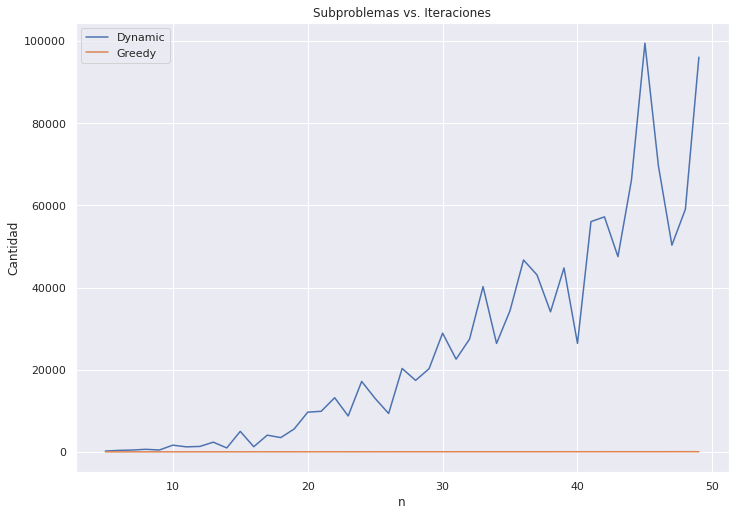

In [32]:
x = []; x2 = []
y = []; y2 = []

for n in range(5, 50):

  W, val, wt = knapsack_instance_generator(n)
  W, val, wt

  value, items, iterations = metodo_greedy(W, val, wt, n)
  value, subproblems,a = metodo_dinamico(W,val,wt,n)

  x.append(n)
  x2.append(n)
  y.append(subproblems)
  y2.append(iterations)


plt.plot(x,y)
plt.plot(x2,y2)

plt.legend(["Dynamic", "Greedy"])
plt.title("Subproblemas vs. Iteraciones")

plt.xlabel('n')
plt.ylabel('Cantidad')
plt.show()

La cantidad de subproblemas dependera de $W$ por lo que observamos en la figura que el algoritmo de programacion dinamica resuelve una gran cantidad de estos.